## Python statistics essential training - 05_06_bayesian

Standard imports

In [4]:
import math

In [5]:
import numpy as np
import pandas as pd

In [6]:
import matplotlib
import matplotlib.pyplot as pp

In [7]:
%matplotlib inline

In [8]:
import pymc as pm

In [9]:
n = 100
k = 61

with pm.Model() as coin_context:
    p = pm.Uniform('p',0.40,0.80)
    
    y = pm.Binomial('y',n=n,p=p,observed=k)
    
    trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [p]


Output()

Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 71 seconds.


In [10]:
pm.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
p,0.608,0.048,0.519,0.7,0.0,0.0,15537.0,24507.0,1.0


array([[<Axes: title={'center': 'p'}>, <Axes: title={'center': 'p'}>]],
      dtype=object)

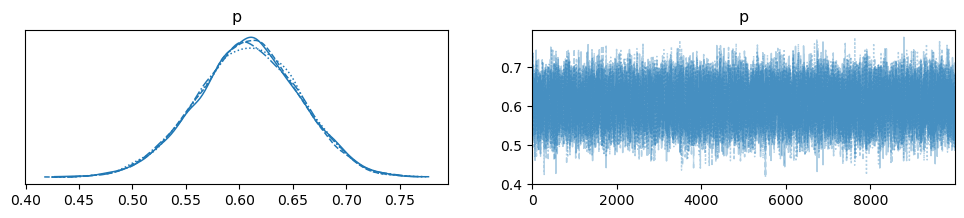

In [11]:
pm.plot_trace(trace)

In [12]:
gdata=pd.read_csv('gapminder.csv').query('year == 1985')

In [13]:
gdata.sort_values('age5_surviving',inplace=True)

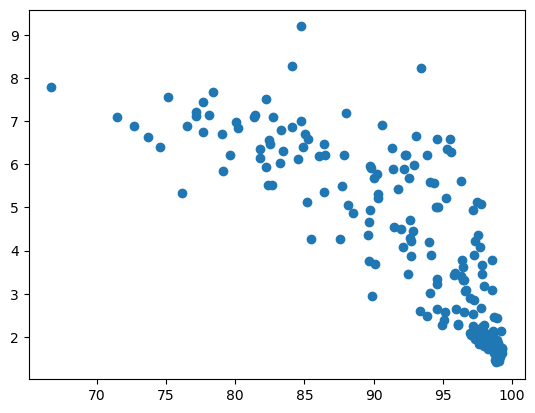

In [14]:
pp.scatter(gdata['age5_surviving'],gdata['babies_per_woman'])

In [15]:
with pm.Model() as gapminder_context:
    intercept = pm.Uniform('intercept',5,15)
    slope = pm.Uniform('slope',-1,1)
    
    babies = pm.Normal('babies',
                       mu = intercept + slope * (gdata['age5_surviving'] - 65),
                       sigma = 1,
                       observed = gdata['babies_per_woman'])
    
    trace = pm.sample(10000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [intercept, slope]


Output()

Sampling 4 chains for 1_000 tune and 10_000 draw iterations (4_000 + 40_000 draws total) took 81 seconds.


In [16]:
pm.summary(trace)

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
intercept,10.193,0.277,9.654,10.698,0.003,0.002,6745.0,8533.0,1.0
slope,-0.219,0.010,-0.238,-0.201,0.000,0.000,6751.0,8558.0,1.0


In [17]:
trace

Inference data with groups:
	> posterior
	> sample_stats
	> observed_data

array([[<Axes: title={'center': 'intercept'}>,
        <Axes: title={'center': 'intercept'}>],
       [<Axes: title={'center': 'slope'}>,
        <Axes: title={'center': 'slope'}>]], dtype=object)

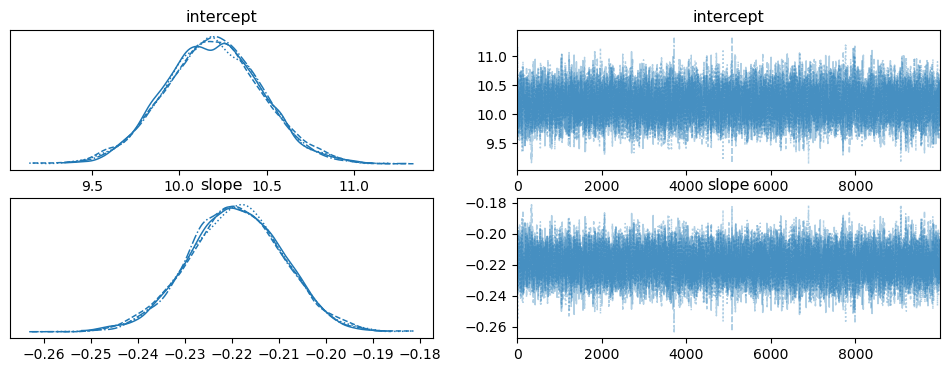

In [18]:
pm.plot_trace(trace)

In [19]:
intercept_samples = trace.posterior['intercept'].values.flatten()
slope_samples = trace.posterior['slope'].values.flatten()

# Compute the predicted babies
babies = intercept_samples.mean() + slope_samples.mean() * (gdata['age5_surviving'] - 65)

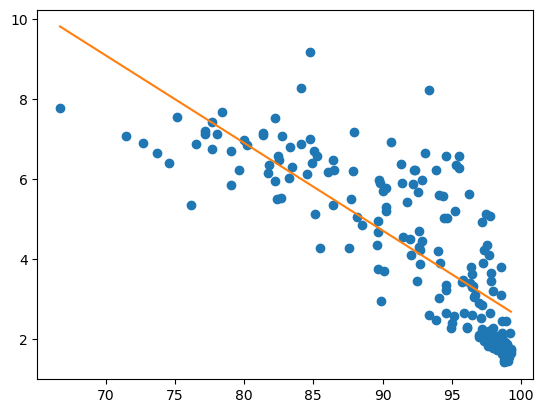

In [20]:
pp.scatter(gdata['age5_surviving'],gdata['babies_per_woman'])
pp.plot(gdata['age5_surviving'],babies,'C1')

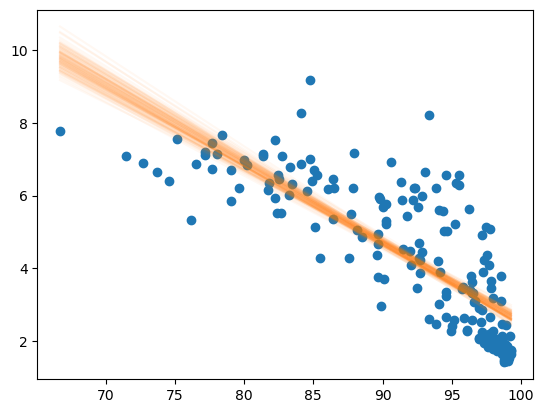

In [21]:
pp.scatter(gdata['age5_surviving'],gdata['babies_per_woman'])

for i, intercept, slope in zip(range(100),intercept_samples[::50],slope_samples[::50]):
    babies = intercept + slope * (gdata['age5_surviving'] - 65)
    pp.plot(gdata['age5_surviving'],babies,'C1',alpha=0.05)